In [1]:
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["Label"] = 1
true["Label"] = 0
fake

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


# Combining 

In [3]:
frames = [fake, true]
news_dataset= pd.concat(frames)
news_dataset

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


# Shuffling data

In [4]:
news_dataset = news_dataset .sample(frac = 1)
news_dataset.head()

,title,text,subject,date,Label
13660,Czech election winner Babis says his cabinet t...,PRAGUE (Reuters) - Czech ANO party leader Andr...,worldnews,"November 28, 2017",0
8920,Micheal Moore Demands MI Republican Gov. Be A...,Michael Moore has joined others in calling for...,News,"January 6, 2016",1
17168,Britain says chances of resolving Northern Ire...,LONDON (Reuters) - The chances of Northern Ire...,worldnews,"October 18, 2017",0
14090,“RACIST” President Jackson To Be Replaced With...,Obama has filled his cabinet with radical yes...,politics,"Apr 18, 2016",1
20537,"U.S.-backed forces, Syrian army advance separa...","BEIRUT/AL SHADADI, Syria (Reuters) - U.S.-back...",worldnews,"September 8, 2017",0


# Pre-Processing

In [5]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
news_dataset= news_dataset.drop(['title','subject','date'],axis=1)


# Stemming text

In [9]:
port_stem = PorterStemmer()

In [10]:
def stemming(content):
    strmmed_content = re.sub('[^a-zA-Z]',' ',content)
    strmmed_content = strmmed_content.lower()
    strmmed_content = strmmed_content.split()
    strmmed_content = [port_stem.stem(word) for word in  strmmed_content   if not word in stopwords.words('english')]
    strmmed_content  = ' '.join( strmmed_content )
    return  strmmed_content

In [11]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [12]:
print(news_dataset['text'])

13660    pragu reuter czech ano parti leader andrej bab...
8920     michael moor join other call u attorney gener ...
17168    london reuter chanc northern ireland polit par...
14090    obama fill cabinet radic ye men women hold sim...
20537    beirut al shadadi syria reuter u back militia ...
                               ...                        
11855    unit nation reuter u ambassador unit nation ni...
15383    sorri tiger hillari lot influenc unlik anyth g...
16617    london reuter britain believ quickli agre fram...
15846    media coverag black thug shot white polic offi...
3933     washington reuter u senat vote narrowli wednes...
Name: text, Length: 44898, dtype: object


In [13]:
X = news_dataset['text'].values
y = news_dataset['Label'].values

In [14]:
print(X)

['pragu reuter czech ano parti leader andrej babi said tuesday expect minor cabinet take power dec would enabl attend european union summit prime minist meet presid milo zeman babi said yet secur back cabinet lower hous parliament ano seat parti far reject join back babi administr lack direct left right ideolog babi octob elect pledg cut corrupt among mainstream parti fight immigr make govern effici pro busi convinc mr presid earlier date appoint cabinet dec dec european council take place obvious import babi told report progress negoti great britain departur eu main topic summit babi said zeman would appoint dec prime minist full cabinet dec date new team take power regardless whether parliamentari major main stick point babi businessman rank forb second richest czech worth billion polic want parliament lift immun charg illeg tap eu subsidi decad ago deni wrongdo case made toxic eight parliamentari faction parliamentari vote immun expect come week lack mainstream partner rais prospect

In [15]:
print(y)

[0 1 0 ... 0 1 0]


# Data Transformation 

###          -   converting the textuel data to numerical data

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
x = vectorizer.transform(X)

In [17]:
print(x)

  (0, 88905)	0.18305624906605655
  (0, 87825)	0.03434568991447226
  (0, 86563)	0.057095536118664345
  (0, 86404)	0.03594423466775569
  (0, 86395)	0.04811959585504187
  (0, 85949)	0.03842435108117153
  (0, 85307)	0.03161343766354528
  (0, 84840)	0.025024241929546807
  (0, 84337)	0.04940755344626934
  (0, 83779)	0.05655777541309288
  (0, 81385)	0.03802719960043479
  (0, 79731)	0.029692437348613165
  (0, 78647)	0.06469298272076827
  (0, 78454)	0.053920406126657
  (0, 78266)	0.02241005621874602
  (0, 76300)	0.03837389539414783
  (0, 75939)	0.05793898107905529
  (0, 75693)	0.0953334154226888
  (0, 74869)	0.02367318664712243
  (0, 74683)	0.10265067232585338
  (0, 74461)	0.059878785176255264
  (0, 73820)	0.05390700828957149
  (0, 73549)	0.04102259427757613
  (0, 72744)	0.06974107952107364
  (0, 72320)	0.04790323471253147
  :	:
  (44897, 14843)	0.029724237430030855
  (44897, 14119)	0.02748553846533636
  (44897, 13699)	0.027733884665922276
  (44897, 13247)	0.03735245761116668
  (44897, 12546)	0

In [18]:
print(x.shape)

(44898, 89633)


# Data Splitting

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

# ML XGBOOST

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
tfidf_val_predict = tfidf.predict( X_test)
print('Tfidf Vectorizer score :',accuracy_score(Y_test, tfidf_val_predict))

Tfidf Vectorizer score : 0.9977728285077951


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9976575809199318
Recall =  0.998082658713251
f1_score =  0.997870074547391


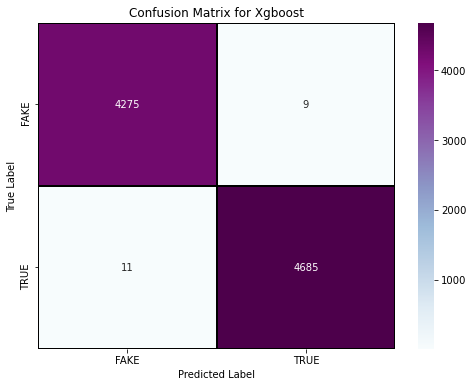

In [24]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')
plt.savefig('confision matrix for XGBoost',dpi=300)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob= xgb.predict_proba(X_test)

In [30]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
# auc scores
auc_score = roc_auc_score(Y_test, pred_prob[:,1])
print(auc_score)

0.9998800556565614


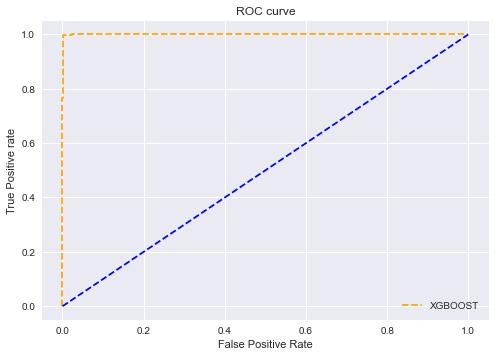

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of XGBOOST ',dpi=300)
plt.show();

# MLP

In [92]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(500,450,300),
                        max_iter = 800,activation = 'tanh',
                        solver = 'sgd')

mlp_clf.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(500, 450, 300),
              max_iter=800, solver='sgd')

In [93]:
y_pred= mlp_clf.predict(X_test)

print('Accuracy: {:.7f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.9898664


In [95]:
print('Precision = ', precision_score(y_pred, Y_test))
print('Recall = ', recall_score(y_pred, Y_test))
print('f1_score = ', f1_score(y_pred, Y_test))

Precision =  0.9926393270241851
Recall =  0.9882747068676717
f1_score =  0.9904522085825203


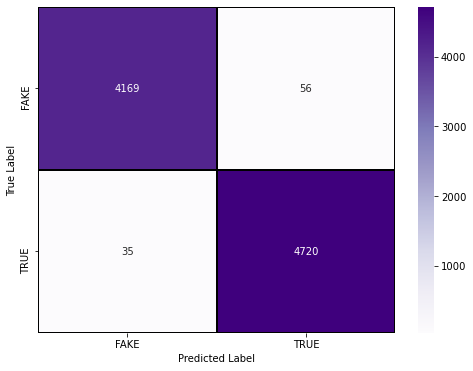

In [96]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for MLP',dpi=300)

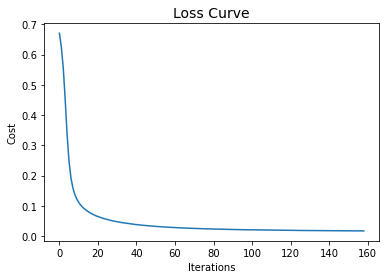

In [97]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [127]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(500,450,100),
                        max_iter = 200,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(500, 450, 100))

In [128]:
y_pred= mlp_clf.predict(X_test)

print('Accuracy: {:.7f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.9867483


# Tensorflow

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=600)
x = tfidf_vect.fit_transform(X).toarray()

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [81]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [82]:
max_features = X_train.shape[1]
max_features
X_train.shape

(35918, 600)

In [83]:
model1 = Sequential()
model1.add(Dense(150, activation='tanh', kernel_initializer='he_normal', input_shape=(max_features,)))
model1.add(Dense(100, activation='tanh', kernel_initializer='he_normal'))
model1.add(Dense(50, activation='tanh', kernel_initializer='he_normal'))
model1.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model1.add(Dense(1, activation='sigmoid'))

In [84]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [85]:
model1.fit(X_train, Y_train, epochs=90, batch_size=32,verbose=1)

Epoch 1/90
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0818 - accuracy: 0.9730
Epoch 2/90
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 3/90
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 4/90
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 5/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0213 - accuracy: 0.9936
Epoch 6/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 7/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0156 - accuracy: 0.9954
Epoch 8/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 9/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0139 - accuracy: 0.9951
Epoch 10/90
1123/1123 [==============================] - 3s 3ms/step - loss: 0.011

In [86]:
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.7f' % acc)

Test Accuracy: 0.9939867


In [88]:
y_pred=model1.predict(X_test)

binary_predictions =[]

for i in y_pred:
    if i >=0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [89]:
# Importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Model accuracy is ",accuracy_score(binary_predictions,Y_test)*100)
print("Model precision is ",precision_score(binary_predictions,Y_test)*100)
print("Model recall is ",recall_score(binary_predictions,Y_test)*100)
print("Model f1_score is ",f1_score(binary_predictions,Y_test)*100)

Model accuracy is  99.39866369710467
Model precision is  99.39011566771819
Model recall is  99.4737949905283
Model f1_score is  99.43193772354302


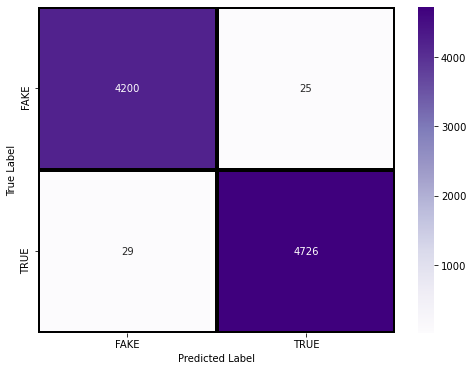

In [90]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, binary_predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 3 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Confusion Matrix for tensorflow')
plt.savefig('confusion matrix for tensorflow 5',dpi=300)

# pytorch

In [106]:
import torch
import torch.nn as nn

In [107]:
vectorizer_text = TfidfVectorizer(stop_words="english",max_features=8000)
text_matrix = vectorizer_text.fit_transform(X).toarray()

print("Finished")

Finished


In [108]:
print(news_dataset.shape)

print(text_matrix.shape)

# Creating Y
y = news_dataset.Label

# Creating X
x=text_matrix

(44898, 2)
(44898, 8000)


In [109]:

from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35918, 8000)
(8980, 8000)
(35918,)
(8980,)


In [110]:
import torch.nn as nn
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() # Inhertiting
        
        self.linear1 = nn.Linear(8000,6000) # IN 4000 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1
        
        self.linear2 = nn.Linear(6000,3000) # IN 2000 OUT 1000
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(3000,1000) # IN 1000 OUT 500
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(1000,100) # IN 500 OUT 100
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(100,20) # IN 500 OUT 100
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT 
        
    
    def forward(self,x):
        
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)
        
        out = self.linear5(out) # Hidden Layer 3 
        out = self.relu5(out)
        
        out = self.linear6(out) # Output Layer
        
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss() #binary_crossentropy


In [111]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 150

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.697046160697937
Loss after iteration 1 is 1.2117911577224731
Loss after iteration 2 is 0.8583230972290039
Loss after iteration 3 is 0.7209729552268982
Loss after iteration 4 is 0.6626813411712646
Loss after iteration 5 is 0.5789198279380798
Loss after iteration 6 is 0.42437660694122314
Loss after iteration 7 is 0.25888457894325256
Loss after iteration 8 is 0.5198290944099426
Loss after iteration 9 is 0.176313579082489
Loss after iteration 10 is 0.2459963858127594
Loss after iteration 11 is 0.1079857349395752
Loss after iteration 12 is 0.154530331492424
Loss after iteration 13 is 0.1406022310256958
Loss after iteration 14 is 0.09772063791751862
Loss after iteration 15 is 0.07625406235456467
Loss after iteration 16 is 0.08136831223964691
Loss after iteration 17 is 0.0753089189529419
Loss after iteration 18 is 0.05092330649495125
Loss after iteration 19 is 0.035624515265226364
Loss after iteration 20 is 0.03485839441418648
Loss after iteration 21 is 0.035497788

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Prediction
y_head = model(X_test)
print(y_head[0])

# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print(" accuracy = ",accuracy_score(y_pred,Y_test)*100)
print(" precision = ",precision_score(y_pred,Y_test)*100)
print(" recall = ",recall_score(y_pred,Y_test)*100)
print(" f1_score = ",f1_score(y_pred,Y_test)*100)

tensor([-100.0362,  -68.2395], grad_fn=<SelectBackward0>)
tensor(1)
 accuracy =  98.35189309576838
 precision =  98.38065194532072
 recall =  98.50494841019162
 f1_score =  98.44276094276094


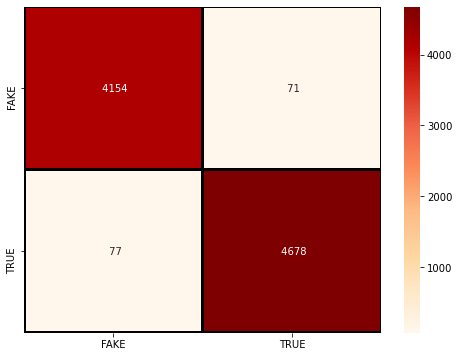

In [113]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test) #y_true=y_test

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix,cmap= "OrRd", linecolor = 'black' ,annot=True,fmt=" ",linewidths=2,xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.show()